In [622]:
# Importing the modules
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [623]:
dengue_features = pd.read_csv('/content/dengue_features_train_1457.csv')
dengue_labels = pd.read_csv('/content/dengue_labels_train_1457.csv')

print('{:>26} {:>11}'.format('Rows', 'Columns'))

print('Dengue Features' + '{:>11} {:>8}'.format(dengue_features.shape[0], dengue_features.shape[1]))

print('Dengue Labels' + '{:>13} {:>8}'.format(dengue_labels.shape[0], dengue_labels.shape[1]))

                      Rows     Columns
Dengue Features       1456       24
Dengue Labels         1456        4


In [624]:
dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [625]:
dengue_labels.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


# Custimizing the plot

In [626]:
plt.style.use('seaborn') # Setting plot style

plt.rcParams['figure.figsize'] = [10, 8] # Setting plot size

# Finding the year that has maximum cases of dengue

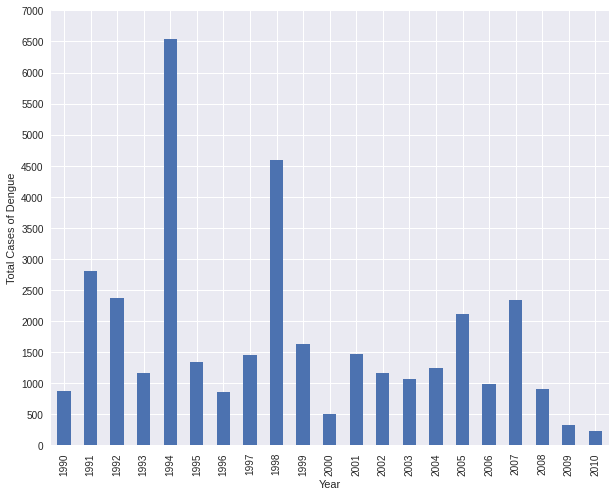

In [627]:
year_max_cases = dengue_labels.groupby(['year'])['total_cases'].agg('sum')

#Visualizing it
year_max_cases.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.yticks(np.arange(0,7500, step=500))
plt.show()

# Data Preprocessing

### 1. Checking null entries

In [628]:
dengue_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [629]:
# Checking columns having null values
dengue_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [630]:
# Getting the list of columns having missing values
x = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()
x

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [631]:
# Filling the missing value with mean
for i in x:
    dengue_features[i] = dengue_features[i].fillna(dengue_features[i].mean())

### Converting all the temperatures from Kelvin to Centigrade

In [632]:
temperature_kelvin_columns = [i for i in dengue_features.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k']

In [633]:
for i in temperature_kelvin_columns:
    dengue_features[i] = dengue_features[i] - 273.15

In [634]:
# Changing the column names from _temp_k to _temp_c
dengue_features.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in dengue_features.columns if i.find('_temp_k')]

## 2. Rounding every value upto 3 decimal places

In [635]:
dengue_features = dengue_features.round(3)

dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.123,0.104,0.198,0.178,12.42,24.423,24.593,19.264,26.65,22.75,32.00,73.366,12.42,14.013,2.629,25.443,6.900,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.170,0.142,0.162,0.155,22.82,25.061,25.293,20.801,27.75,23.25,17.94,77.369,22.82,15.373,2.371,26.714,6.371,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032,0.173,0.157,0.171,34.54,25.631,25.729,22.284,27.35,24.15,26.10,82.053,34.54,16.849,2.300,26.714,6.486,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.129,0.245,0.228,0.236,15.36,25.837,26.079,22.160,28.25,23.85,13.90,80.337,15.36,16.673,2.429,27.471,6.771,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196,0.262,0.251,0.247,7.52,26.369,26.514,22.671,28.75,24.35,12.20,80.460,7.52,17.210,3.014,28.943,9.371,35.0,23.9,5.8


### Combining station_max_temp_c and station_min_temp_c as avg_station_max_min

In [636]:
dengue_features['avg_station_max_min'] = (dengue_features['station_max_temp_c'] + 
                                          dengue_features['station_min_temp_c']) / 2

dengue_features['avg_station_max_min'].head()

0    24.70
1    26.95
2    27.50
3    28.30
4    29.45
Name: avg_station_max_min, dtype: float64

## Combining reanalysis_max_air_temp_c and reanalysis_min_air_temp_c as avg_analysis_max_min

In [637]:
dengue_features['avg_analysis_max_min'] = (dengue_features['reanalysis_max_air_temp_c'] + 
                                           dengue_features['reanalysis_min_air_temp_c']) / 2

dengue_features['avg_analysis_max_min'].head()

0    24.70
1    25.50
2    25.75
3    26.05
4    26.55
Name: avg_analysis_max_min, dtype: float64

In [638]:
# Adding total cases
dengue_features['total_cases'] = dengue_labels['total_cases']

In [639]:
# Summary statistics
dengue_features.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.142249,0.130568,0.203781,0.202295,45.760385,25.551865,26.075588,22.096353,30.277109,22.569155,40.151820,82.161966,45.760385,16.746426,4.903755,27.185795,8.059324,32.452431,22.102148,39.326354,27.277290,26.423132,24.675137
std,5.408314,15.019437,0.130830,0.117844,0.073299,0.083268,43.519806,1.357720,1.257382,1.522545,3.223466,2.556533,43.284882,7.129281,43.519806,1.537181,3.534244,1.273107,2.096867,1.945806,1.566475,47.095179,1.331498,1.325096,43.596000
min,1990.000000,1.000000,-0.406000,-0.456000,-0.016000,-0.063000,0.000000,21.486000,21.743000,16.493000,24.650000,13.750000,0.000000,57.787000,0.000000,11.716000,1.357000,21.400000,4.529000,26.700000,14.700000,0.000000,22.800000,22.650000,0.000000
25%,1997.000000,13.750000,0.055750,0.051000,0.156000,0.145000,9.960000,24.515250,25.114000,20.980500,27.850000,20.750000,13.200000,77.226750,9.960000,15.561000,2.329000,26.329000,6.529000,31.100000,21.100000,8.850000,26.400000,25.400000,5.000000
50%,2002.000000,26.500000,0.142000,0.128000,0.197000,0.191000,38.710000,25.512000,26.117500,22.476000,29.350000,23.050000,27.370000,80.369500,38.710000,17.065000,2.864000,27.386000,7.386000,32.800000,22.200000,24.450000,27.500000,26.500000,12.000000
75%,2005.000000,39.250000,0.229250,0.212250,0.247000,0.246250,70.047500,26.677500,27.057000,23.306250,32.350000,24.750000,52.042500,86.041000,70.047500,17.974500,7.553750,28.129000,9.500000,33.900000,23.300000,53.600000,28.300000,27.400000,28.000000
max,2010.000000,53.000000,0.508000,0.454000,0.538000,0.546000,390.600000,29.050000,29.779000,25.300000,40.850000,26.750000,570.500000,98.610000,390.600000,20.461000,16.029000,30.800000,15.800000,42.200000,25.600000,543.300000,32.000000,31.250000,461.000000


## Feature Engineering

### 3. The dengue cases of San Juan sj and Iquitos iq are not dependent. So splitting them into different DataFrames

In [640]:
X_sj = dengue_features[dengue_features['city'] == 'sj']
X_iq = dengue_features[dengue_features['city'] == 'iq']

In [641]:
X_sj = X_sj.drop(['city', 'weekofyear', 'week_start_date'], axis=1)
X_iq = X_iq.drop(['city', 'weekofyear', 'week_start_date'], axis=1)

In [642]:
one_hot_sj = pd.get_dummies(X_sj['year'])
X_sj = X_sj.drop('year', axis=1)
X_sj = X_sj.join(one_hot_sj)

In [643]:
one_hot_iq = pd.get_dummies(X_iq['year'])
X_iq = X_iq.drop('year', axis=1)
X_iq = X_iq.join(one_hot_iq)

## 4. Changing the order of columns in X_sj and X_iq DataFrames

In [644]:
years = X_sj.columns[:23:-1].values.tolist()
X_sj = X_sj[years[::-1]].join(X_sj[X_sj.columns[:24]])
X_sj.head()

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases,1990
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.123,0.104,0.198,0.178,12.42,24.423,24.593,19.264,26.65,22.75,32.00,73.366,12.42,14.013,2.629,25.443,6.900,29.4,20.0,16.0,24.70,24.70,4,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.170,0.142,0.162,0.155,22.82,25.061,25.293,20.801,27.75,23.25,17.94,77.369,22.82,15.373,2.371,26.714,6.371,31.7,22.2,8.6,26.95,25.50,5,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.032,0.173,0.157,0.171,34.54,25.631,25.729,22.284,27.35,24.15,26.10,82.053,34.54,16.849,2.300,26.714,6.486,32.2,22.8,41.4,27.50,25.75,4,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.129,0.245,0.228,0.236,15.36,25.837,26.079,22.160,28.25,23.85,13.90,80.337,15.36,16.673,2.429,27.471,6.771,33.3,23.3,4.0,28.30,26.05,3,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.196,0.262,0.251,0.247,7.52,26.369,26.514,22.671,28.75,24.35,12.20,80.460,7.52,17.210,3.014,28.943,9.371,35.0,23.9,5.8,29.45,26.55,6,1


In [645]:
years = X_iq.columns[:23:-1].values.tolist()
X_iq = X_iq[years[::-1]].join(X_iq[X_iq.columns[:24]])
X_iq.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases,2000
936,0,0,0,0,0,0,0,0,0,0,0.193,0.132,0.341,0.247,25.41,23.590,25.300,22.034,34.15,19.95,43.19,92.419,25.41,16.651,8.929,26.400,10.775,32.5,20.7,3.0,26.60,27.05,0,1
937,0,0,0,0,0,0,0,0,0,0,0.217,0.276,0.289,0.242,60.61,23.484,25.279,22.209,33.45,17.95,46.00,93.581,60.61,16.863,10.314,26.900,11.567,34.0,20.8,55.6,27.40,25.70,0,1
938,0,0,0,0,0,0,0,0,0,0,0.177,0.173,0.204,0.128,55.52,23.266,24.243,22.473,31.35,19.45,64.77,95.849,55.52,17.120,7.386,26.800,11.467,33.0,20.7,38.1,26.85,25.40,0,1
939,0,0,0,0,0,0,0,0,0,0,0.228,0.145,0.254,0.200,5.60,22.207,23.079,19.647,30.45,15.45,23.96,87.234,5.60,14.431,9.114,25.767,10.533,31.5,14.7,30.0,23.10,22.95,0,1
940,0,0,0,0,0,0,0,0,0,0,0.329,0.322,0.254,0.361,62.76,23.283,24.486,20.807,33.85,18.35,31.80,88.161,62.76,15.444,9.500,26.600,11.480,33.3,19.1,4.0,26.20,26.10,0,1


In [646]:
# Removing dummy variable trap
X_sj = X_sj.drop(1990, axis=1)
X_iq = X_iq.drop(2000, axis=1)
X_iq.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,avg_station_max_min,avg_analysis_max_min,total_cases
936,0,0,0,0,0,0,0,0,0,0,0.193,0.132,0.341,0.247,25.41,23.590,25.300,22.034,34.15,19.95,43.19,92.419,25.41,16.651,8.929,26.400,10.775,32.5,20.7,3.0,26.60,27.05,0
937,0,0,0,0,0,0,0,0,0,0,0.217,0.276,0.289,0.242,60.61,23.484,25.279,22.209,33.45,17.95,46.00,93.581,60.61,16.863,10.314,26.900,11.567,34.0,20.8,55.6,27.40,25.70,0
938,0,0,0,0,0,0,0,0,0,0,0.177,0.173,0.204,0.128,55.52,23.266,24.243,22.473,31.35,19.45,64.77,95.849,55.52,17.120,7.386,26.800,11.467,33.0,20.7,38.1,26.85,25.40,0
939,0,0,0,0,0,0,0,0,0,0,0.228,0.145,0.254,0.200,5.60,22.207,23.079,19.647,30.45,15.45,23.96,87.234,5.60,14.431,9.114,25.767,10.533,31.5,14.7,30.0,23.10,22.95,0
940,0,0,0,0,0,0,0,0,0,0,0.329,0.322,0.254,0.361,62.76,23.283,24.486,20.807,33.85,18.35,31.80,88.161,62.76,15.444,9.500,26.600,11.480,33.3,19.1,4.0,26.20,26.10,0


In [647]:
x_sj_arr = X_sj.iloc[:].values
x_iq_arr = X_iq.iloc[:].values

x_sj_arr[1]

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.17 ,  0.142,  0.162,  0.155, 22.82 , 25.061,
       25.293, 20.801, 27.75 , 23.25 , 17.94 , 77.369, 22.82 , 15.373,
        2.371, 26.714,  6.371, 31.7  , 22.2  ,  8.6  , 26.95 , 25.5  ,
        5.   ])

In [648]:
# np.random.seed(23)
np.random.shuffle(x_sj_arr)
np.random.shuffle(x_iq_arr)

x_sj_arr[1]

array([ 0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.118,  0.108,  0.156,  0.166, 36.58 , 27.251,
       27.514, 23.699, 29.65 , 25.85 , 38.3  , 81.09 , 36.58 , 18.354,
        2.729, 29.229,  7.3  , 33.9  , 25.   , 30.6  , 29.45 , 27.75 ,
       11.   ])

## 5. Splitting the dataframes into train and test

In [649]:
from sklearn.model_selection import train_test_split

X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(x_sj_arr[:, :-1], x_sj_arr[:, -1], test_size=0.2)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(x_iq_arr[:, :-1], x_iq_arr[:, -1], test_size=0.2)
y_sj_test 

array([ 24.,  43.,  32.,   9.,   7.,  42.,  19.,  20.,  12.,  21.,  53.,
        17.,  36.,  12.,  11.,   9.,  75.,   9.,  35.,  31.,  35.,  28.,
        50., 170.,  75.,  13.,   6.,  36.,  22.,  68.,  26., 333.,  30.,
         4.,   8.,   3.,  19.,   9.,  27.,   4.,  29.,   6.,  67.,   7.,
         5.,  32., 263.,   8.,  71.,  73.,  77.,  13.,  33., 256.,   2.,
        62.,  29.,  54.,  27.,  15.,  44.,  45.,  82.,  13.,  14.,   5.,
        19.,   8.,  11.,  25.,  29.,  16.,  12.,  25.,  28.,  15., 127.,
       129.,  46.,  14., 112.,  12.,  22.,   9.,   6.,  28.,  39.,   2.,
       131.,   3.,   2.,  30.,  24.,   3., 112.,  67.,   5.,  13., 140.,
        11.,  23.,   7.,  31.,  10.,  17.,  76.,  42.,  14.,  36.,  56.,
         3.,  38.,   8.,   7.,  16.,  57.,  20.,  73., 364.,  30.,  14.,
         7., 272.,  33.,  30., 104.,   8.,  42.,  17.,  11.,  21.,   3.,
        18.,  16.,  13.,   8.,  64.,  99.,   7.,   8.,  25.,   2.,   6.,
       119.,  13.,  22.,  10.,  11.,  16.,  25.,  3

## 6. Applying Feature Scaling

In [650]:
from sklearn.preprocessing import StandardScaler

sj_scaler = StandardScaler()
X_sj_train = sj_scaler.fit_transform(X_sj_train)
X_sj_test = sj_scaler.transform(X_sj_test)


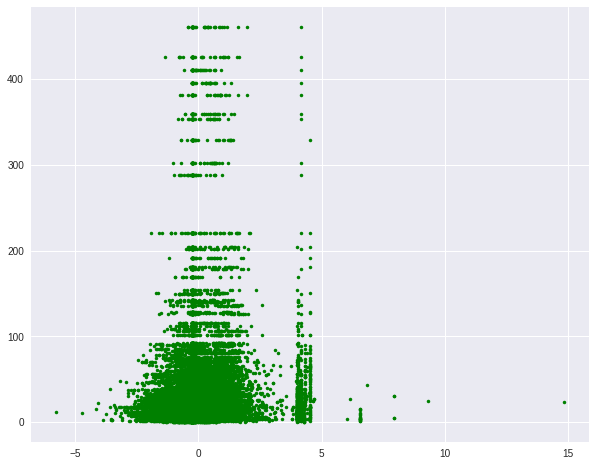

In [651]:
plt.plot(X_sj_train, y_sj_train, marker='.', color='green', linestyle='none')
plt.show()

# modelling

# KNeighborsRegressor

In [652]:
from sklearn.neighbors import KNeighborsRegressor

sj_knn = KNeighborsRegressor(n_neighbors=5)

sj_knn.fit(X_sj_train, y_sj_train)

KNeighborsRegressor()

In [653]:
y_sj_pred = sj_knn.predict(X_sj_test)

19.357446808510637


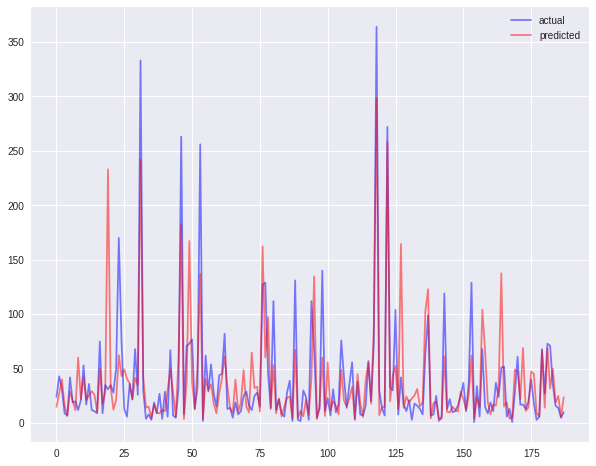

In [654]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation


print(mean_absolute_error(y_sj_test, y_sj_pred))

plt.plot(y_sj_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_sj_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

In [655]:
iq_scaler = StandardScaler()
X_iq_train = iq_scaler.fit_transform(X_iq_train)
X_iq_test = iq_scaler.transform(X_iq_test)

In [656]:
iq_knn = KNeighborsRegressor(n_neighbors=5)

iq_knn.fit(X_iq_train, y_iq_train)

KNeighborsRegressor()

5.709615384615384


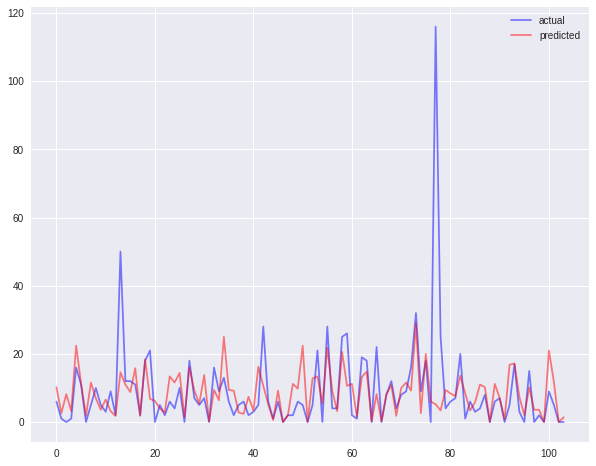

In [657]:
y_iq_pred = iq_knn.predict(X_iq_test)
print(mean_absolute_error(y_iq_test, y_iq_pred))

plt.plot(y_iq_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_iq_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

# Random Forest

19.36361864212734


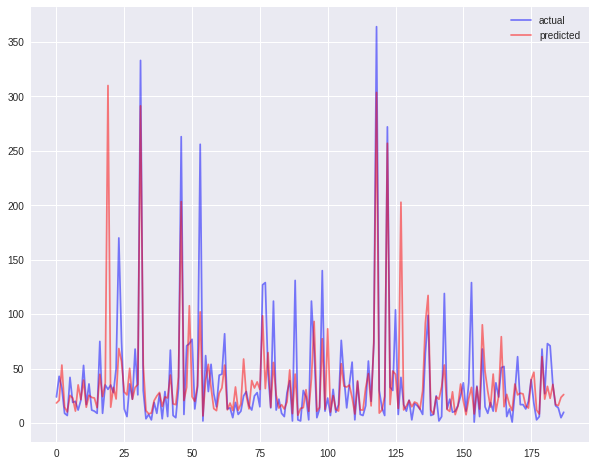

In [658]:
from sklearn.ensemble import RandomForestRegressor

sj_ada = RandomForestRegressor(n_estimators=50, max_depth=15)
sj_ada.fit(X_sj_train, y_sj_train)

y_sj_pred = sj_ada.predict(X_sj_test)

print(mean_absolute_error(y_sj_test, y_sj_pred))

plt.plot(y_sj_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_sj_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

6.213866333967027


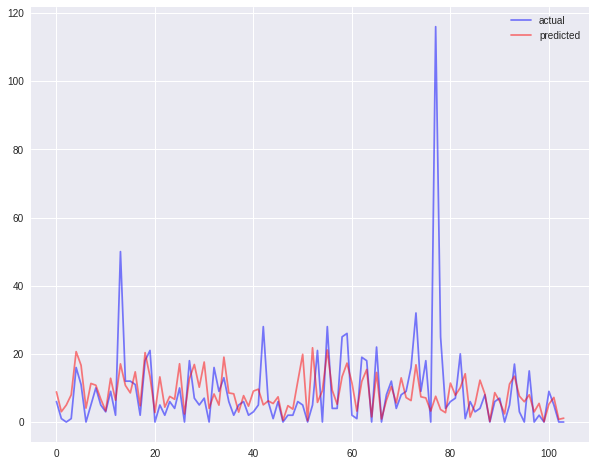

In [659]:
iq_ada = RandomForestRegressor(n_estimators=50, max_depth=15)
iq_ada.fit(X_iq_train, y_iq_train)

y_iq_pred = iq_ada.predict(X_iq_test)

print(mean_absolute_error(y_iq_test, y_iq_pred))

plt.plot(y_iq_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_iq_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

# GradientBoostingRegressor

sj MAE :  18.802724107246185


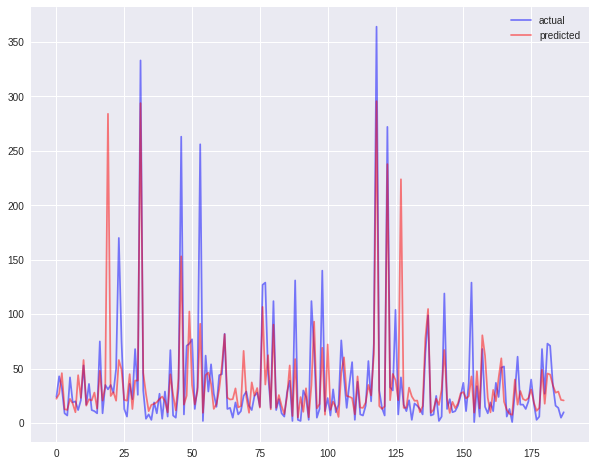

In [660]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_sj_train, y_sj_train)

y_sj_pred = gb_reg.predict( X_sj_test)

print("sj MAE : ", mean_absolute_error(y_sj_test, y_sj_pred))

plt.plot(y_sj_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_sj_pred, alpha=.5, color='red', label = "predicted")
plt.legend()


iq MAE :  5.921003413280289


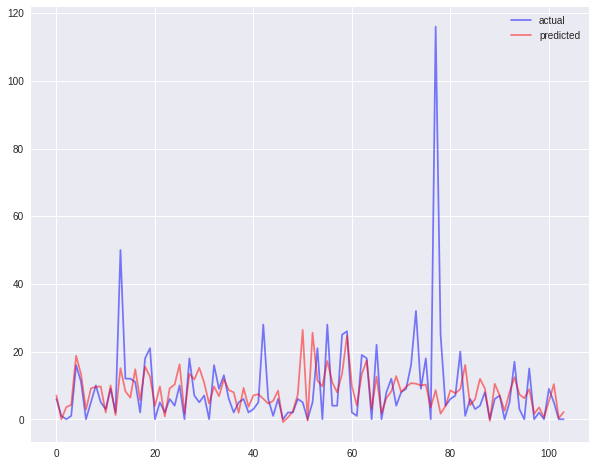

In [661]:
gb_reg.fit(X_iq_train, y_iq_train)
y_iq_pred = gb_reg.predict(X_iq_test)

print("iq MAE : ", mean_absolute_error(y_iq_test, y_iq_pred))

plt.plot(y_iq_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_iq_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

# SupportVectorRegresor

sj MAE :  24.1455207300065


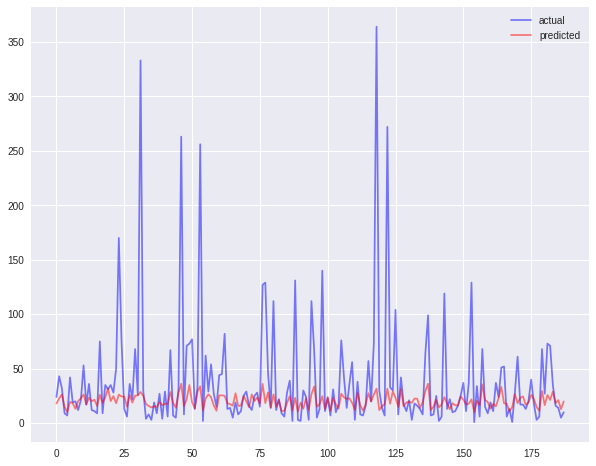

In [662]:
grid_search_svr = SVR()
grid_search_svr.fit(X_sj_train, y_sj_train)

y_sj_pred = grid_search_svr.predict( X_sj_test)

print("sj MAE : ", mean_absolute_error(y_sj_test, y_sj_pred))

plt.plot(y_sj_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_sj_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

iq MAE :  5.882343448433577


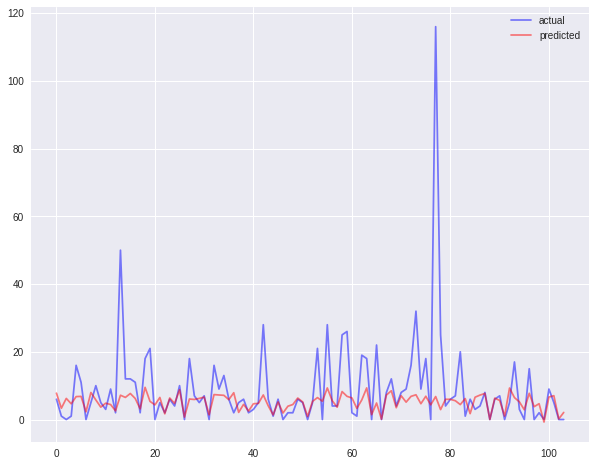

In [663]:
grid_search_svr.fit(X_iq_train, y_iq_train)
y_iq_pred = grid_search_svr.predict(X_iq_test)

print("iq MAE : ", mean_absolute_error(y_iq_test, y_iq_pred))

plt.plot(y_iq_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_iq_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

## Tuning the hyperparameter

In [664]:
from sklearn.model_selection import GridSearchCV

knn_parameters = [{'algorithm':['ball_tree'], 'leaf_size':[25]},
                  {'algorithm':['kd_tree'], 'leaf_size':[25]},
                  {'algorithm':['brute']}]

sj_knn_grid_cv = GridSearchCV(estimator=sj_knn, param_grid=knn_parameters,
                              scoring='neg_mean_absolute_error', cv=5)

In [665]:
sj_knn_grid_cv = sj_knn_grid_cv.fit(X_sj_train, y_sj_train)

#sj_knn_grid_cv.predict(X_sj_test)

#mean_absolute_error(y_sj_test, sj_knn_grid_cv.predict(X_sj_test))
print(sj_knn_grid_cv.best_score_)
print(sj_knn_grid_cv.best_params_)

-18.589762863534677
{'algorithm': 'ball_tree', 'leaf_size': 25}


# TEST

In [666]:
# Importing the modules
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

dengue_tfeatures = pd.read_csv('/content/dengue_features_test_417-null-data.csv')

print('{:>26} {:>11}'.format('Rows', 'Columns'))

print('Dengue tFeatures' + '{:>11} {:>8}'.format(dengue_tfeatures.shape[0], dengue_tfeatures.shape[1]))


                      Rows     Columns
Dengue tFeatures        416       38


# Data Preprocessing

### 1. Checking null entries

In [667]:
dengue_tfeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   416 non-null    object 
 1   year                                   416 non-null    int64  
 2   weekofyear                             416 non-null    int64  
 3   week_start_date                        416 non-null    object 
 4   ndvi_ne                                373 non-null    float64
 5   ndvi_nw                                405 non-null    float64
 6   ndvi_se                                415 non-null    float64
 7   ndvi_sw                                415 non-null    float64
 8   precipitation_amt_mm                   414 non-null    float64
 9   reanalysis_air_temp_k                  414 non-null    float64
 10  reanalysis_avg_temp_k                  414 non-null    float64
 11  reanal

In [668]:
# Checking columns having null values
dengue_tfeatures.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [669]:
# Getting the list of columns having missing values
x = dengue_tfeatures.columns[dengue_tfeatures.isna().sum() > 0].tolist()
x

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm']

In [670]:
# Filling the missing value with mean
for i in x:
    dengue_tfeatures[i] = dengue_tfeatures[i].fillna(dengue_tfeatures[i].mean())

### Converting all the temperatures from Kelvin to Centigrade

In [671]:
temperature_kelvin_columns = [i for i in dengue_tfeatures.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k']

In [672]:
for i in temperature_kelvin_columns:
    dengue_tfeatures[i] = dengue_tfeatures[i] - 273.15

In [673]:
# Changing the column names from _temp_k to _temp_c
dengue_tfeatures.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in dengue_tfeatures.columns if i.find('_temp_k')]

## 2. Rounding every value upto 3 decimal places

In [674]:
dengue_tfeatures = dengue_tfeatures.round(3)

dengue_tfeatures.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,1,2,3,4,5,6,7,8,9,10,11,12,13
411,iq,2013,22,5/28/2013,0.301,0.380,0.281,0.383,41.12,24.624,25.814,22.489,32.35,19.55,67.60,89.990,41.12,17.186,10.100,27.40,9.050,32.6,21.8,33.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
412,iq,2013,23,06-04-13,0.248,0.296,0.285,0.350,71.52,24.017,25.179,22.696,33.15,18.45,45.70,93.891,71.52,17.449,9.657,27.52,10.720,33.8,21.4,68.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
413,iq,2013,24,06-11-13,0.239,0.251,0.253,0.250,78.96,22.681,23.457,21.744,31.45,17.55,45.22,94.967,78.96,16.410,7.386,27.20,10.075,32.6,21.6,93.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
414,iq,2013,25,6/18/2013,0.310,0.303,0.407,0.404,39.54,22.629,24.250,20.499,32.75,19.35,4.70,89.057,39.54,15.137,8.229,26.70,8.480,32.2,21.8,34.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,iq,2013,26,6/25/2013,0.339,0.240,0.357,0.274,51.80,24.223,25.850,21.466,34.15,16.45,27.80,87.030,51.80,16.149,11.543,27.35,9.675,32.6,22.0,14.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Combining station_max_temp_c and station_min_temp_c as avg_station_max_min

In [675]:
dengue_tfeatures['avg_station_max_min'] = (dengue_tfeatures['station_max_temp_c'] + 
                                          dengue_tfeatures['station_min_temp_c']) / 2

dengue_tfeatures['avg_station_max_min'].head()

0    27.50
1    26.10
2    27.80
3    28.85
4    28.30
Name: avg_station_max_min, dtype: float64

## Combining reanalysis_max_air_temp_c and reanalysis_min_air_temp_c as avg_analysis_max_min

In [676]:
dengue_tfeatures['avg_analysis_max_min'] = (dengue_tfeatures['reanalysis_max_air_temp_c'] + 
                                           dengue_tfeatures['reanalysis_min_air_temp_c']) / 2

dengue_tfeatures['avg_analysis_max_min'].head()

0    25.60
1    25.60
2    26.15
3    26.80
4    26.65
Name: avg_analysis_max_min, dtype: float64

In [677]:
# Summary statistics
dengue_tfeatures.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,1,2,3,4,5,6,7,8,9,10,11,12,13,avg_station_max_min,avg_analysis_max_min
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.00000,416.000000,416.0,416.0,416.0,416.0,416.0,416.0,416.0,416.0,416.0,416.0,416.0,416.0,416.0,416.0,416.000000,416.000000
mean,2010.766827,26.439904,0.126048,0.126825,0.207695,0.201736,38.354322,25.668303,26.203067,22.269204,30.473428,22.593476,42.171135,82.499825,38.354322,16.927103,5.124584,27.369594,7.811010,32.534627,22.36856,34.278594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.451594,26.533452
std,1.434835,14.978257,0.155602,0.139526,0.079006,0.091906,35.086274,1.465945,1.303081,1.519432,3.094333,2.754448,48.791517,7.360470,35.086274,1.554105,3.534311,1.214642,2.414041,1.913475,1.71256,34.446562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.272936,1.323781
min,2008.000000,1.000000,-0.463000,-0.212000,0.006000,-0.015000,0.000000,21.404000,22.086000,17.669000,25.050000,13.050000,0.000000,64.920000,0.000000,12.537000,1.486000,24.157000,4.043000,27.200000,14.20000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.750000,22.000000
25%,2010.000000,13.750000,0.008000,0.017000,0.149000,0.134000,8.225000,24.601000,25.177000,21.200000,28.325000,20.350000,9.490000,77.399750,8.225000,15.795500,2.453500,26.529000,5.943000,31.100000,21.20000,9.175000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.575000,25.500000
50%,2011.000000,26.000000,0.126000,0.099000,0.204500,0.186000,31.495000,25.414500,26.179000,22.667500,29.650000,23.100000,25.900000,80.352500,31.495000,17.321500,2.914000,27.433000,6.729000,32.800000,22.20000,23.950000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.550000,26.650000
75%,2012.000000,39.000000,0.248250,0.241000,0.255000,0.253000,57.717500,27.088000,27.371000,23.491750,32.650000,25.075000,56.225000,87.978250,57.717500,18.172250,8.171000,28.278250,9.750000,33.900000,23.30000,47.275000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.300000,27.550000
max,2013.000000,53.000000,0.500000,0.649000,0.453000,0.529000,169.340000,28.786000,30.179000,24.644000,40.950000,26.550000,301.400000,97.983000,169.340000,19.599000,14.486000,30.271000,14.725000,38.400000,26.70000,212.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.550000,31.300000


## Feature Engineering

### 3. The dengue cases of San Juan sj and Iquitos iq are not dependent. So splitting them into different DataFrames

In [678]:
T_sj = dengue_tfeatures[dengue_tfeatures['city'] == 'sj']
T_iq = dengue_tfeatures[dengue_tfeatures['city'] == 'iq']

In [679]:
T_sj = T_sj.drop(['city', 'weekofyear', 'week_start_date'], axis=1)
T_iq = T_iq.drop(['city','weekofyear', 'week_start_date'], axis=1)

In [680]:
one_hot_sj = pd.get_dummies(T_sj['year'])
T_sj = T_sj.drop('year', axis=1)
T_sj = T_sj.join(one_hot_sj)

In [681]:
one_hot_iq = pd.get_dummies(T_iq['year'])
T_iq = T_iq.drop('year', axis=1)
T_iq = T_iq.join(one_hot_iq)

## 4. Changing the order of columns in X_sj and X_iq DataFrames

In [682]:
years = T_sj.columns[:23:-1].values.tolist()
T_sj = T_sj[years[::-1]].join(T_sj[T_sj.columns[:24]])

print('Dengue tFeatures' + '{:>11} {:>8}'.format(T_sj.shape[0], T_sj.shape[1]))

T_sj.tail()

Dengue tFeatures        260       42


,4,5,6,7,8,9,10,11,12,13,avg_station_max_min,avg_analysis_max_min,2008,2009,2010,2011,2012,2013,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,1,2,3
255,0,0,0,0,0,0,0,0,0,0,28.35,25.70,0,0,0,0,0,1,-0.087,-0.016,0.156,0.105,30.34,25.520,25.736,21.526,28.15,23.25,2.55,78.780,30.34,15.986,3.314,27.543,7.943,33.9,22.8,3.5,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,28.05,25.55,0,0,0,0,0,1,-0.203,-0.078,0.204,0.179,6.55,24.886,25.007,21.479,28.35,22.75,64.30,81.650,6.55,15.881,2.829,26.643,6.643,33.3,22.8,17.6,0,0,0,0
257,0,0,0,0,0,0,0,0,0,0,28.05,26.35,0,0,0,0,0,1,-0.118,-0.008,0.193,0.170,0.00,25.907,26.179,21.799,28.35,24.35,0.70,78.286,0.00,16.213,3.171,27.914,8.114,32.8,23.3,9.4,0,0,0,0
258,0,0,0,0,0,0,0,0,0,0,27.80,25.95,0,0,0,0,0,1,0.083,0.031,0.135,0.075,0.00,25.763,25.914,21.529,27.75,24.15,1.40,77.674,0.00,15.966,3.043,27.729,6.943,31.7,23.9,22.9,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,26.40,25.25,0,0,0,0,0,1,-0.087,-0.049,0.130,0.118,45.47,24.917,24.893,20.983,27.05,23.45,19.90,79.046,45.47,15.451,2.343,26.443,6.743,31.1,21.7,47.5,0,0,0,0


In [683]:
years = T_iq.columns[:23:-1].values.tolist()
T_iq = T_iq[years[::-1]].join(T_iq[T_iq.columns[:24]])
print('Dengue tFeatures' + '{:>11} {:>8}'.format(T_iq.shape[0], T_iq.shape[1]))
T_iq.head()

Dengue tFeatures        156       40


,4,5,6,7,8,9,10,11,12,13,avg_station_max_min,avg_analysis_max_min,2010,2011,2012,2013,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,1,2,3
260,0,0,0,0,0,0,0,0,0,0,27.65,27.65,1,0,0,0,0.184,0.142,0.225,0.150,82.29,24.499,26.064,22.969,34.75,20.55,34.11,92.581,82.29,17.654,9.429,27.440,10.760,33.8,21.5,11.2,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,27.10,26.80,1,0,0,0,0.292,0.272,0.331,0.321,25.30,25.074,26.314,21.681,34.55,19.05,9.10,83.886,25.30,16.320,10.157,27.025,9.625,33.0,21.2,8.9,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,27.50,26.30,1,0,0,0,0.209,0.366,0.213,0.256,62.14,24.806,25.814,23.267,33.25,19.35,61.09,92.057,62.14,18.030,9.557,26.950,10.350,33.4,21.6,22.6,0,0,0,0
263,0,0,0,0,0,0,0,0,0,0,23.75,24.70,1,0,0,0,0.089,0.063,0.122,0.082,47.80,22.566,23.493,20.489,33.25,16.15,19.60,88.970,47.80,15.394,7.829,26.900,9.700,33.3,14.2,4.8,0,0,0,0
264,0,0,0,0,0,0,0,0,0,0,25.20,26.15,1,0,0,0,0.306,0.328,0.250,0.268,56.30,25.353,26.850,20.743,34.95,17.35,18.93,78.610,56.30,15.469,11.771,27.050,11.850,33.5,16.9,3.0,0,0,0,0


In [684]:
# Removing dummy variable trap
T_sj = T_sj.drop(2013, axis=1)
T_iq = T_iq.drop(2010, axis=1)
T_iq = T_iq.drop(['1','2','3','4','5','6'], axis=1)


In [685]:
t_sj_arr = T_sj.iloc[:].values
t_iq_arr = T_iq.iloc[:].values


In [686]:
#np.random.seed(26)
np.random.shuffle(t_sj_arr)
np.random.shuffle(t_iq_arr)


T_sj_test =  (t_sj_arr[:, :-1])

T_iq_test = (t_iq_arr[:, :-1])


In [687]:
from sklearn.preprocessing import StandardScaler

sj_scaler1 = StandardScaler()
X_sj_train = sj_scaler1.fit_transform(X_sj_train)
T_sj_test = sj_scaler1.transform(T_sj_test)

In [688]:
iq_scaler1 = StandardScaler()
X_iq_train = iq_scaler1.fit_transform(X_iq_train)
T_iq_test = iq_scaler1.transform(T_iq_test)

# model

# KNeighborsRegressor

In [689]:
y_sj_pred1 = sj_knn.predict(T_sj_test).astype(int)

y_iq_pred1 = iq_knn.predict(T_iq_test).astype(int)

result_knn = pd.read_csv('/content/submission_format_417.csv')

result_knn.total_cases = np.concatenate([y_sj_pred1, y_iq_pred1])

result_knn.to_csv('/content/predicted_knn.csv', index=False)

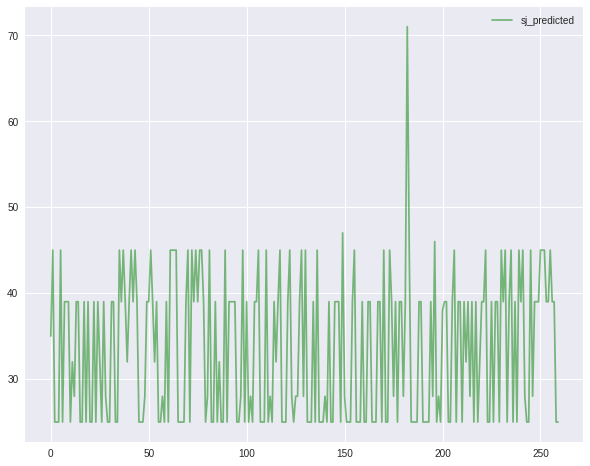

In [690]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation



plt.plot(y_sj_pred1, alpha=.5, color='green', label = "sj_predicted")
plt.legend()

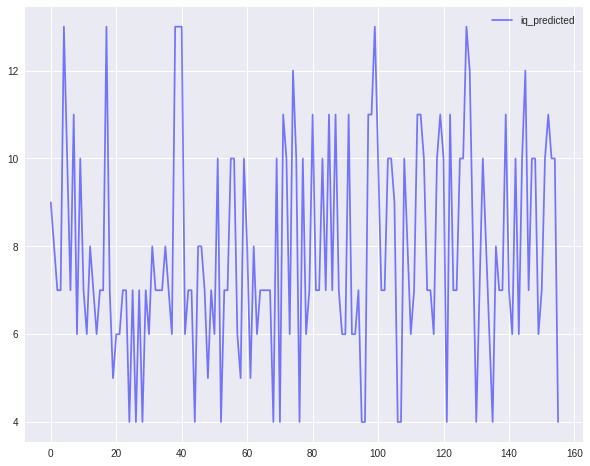

In [691]:
plt.plot(y_iq_pred1, alpha=.5, color='blue', label = "iq_predicted")
plt.legend()